In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt

import pickle
import numpy as np

import MDAnalysis as mda
import MDAnalysis.analysis.hole
import MDAnalysis.analysis.rms
from MDAnalysis.analysis.hole import HOLE, HOLEtraj


In [2]:
def regularized_function(x, y, func, bins=100, range=None):
    """Compute *func()* over data aggregated in bins.
    ``(x,y) --> (x', func(Y'))``  with ``Y' = {y: y(x) where x in x' bin}``
    First the data is collected in bins x' along x and then *func* is
    applied to all data points Y' that have been collected in the bin.
    .. function:: func(y) -> float
       *func* takes exactly one argument, a numpy 1D array *y* (the
       values in a single bin of the histogram), and reduces it to one
       scalar float.
    .. Note:: *x* and *y* must be 1D arrays.
    :Arguments:
       x
          abscissa values (for binning)
       y
          ordinate values (func is applied)
       func
          a numpy ufunc that takes one argument, func(Y')
       bins
          number or array
       range
          limits (used with number of bins)
    :Returns:
       F,edges
          function and edges (``midpoints = 0.5*(edges[:-1]+edges[1:])``)
    (This function originated as
    :func:`recsql.sqlfunctions.regularized_function`.)
    """
    _x = np.asarray(x)
    _y = np.asarray(y)

    if len(_x.shape) != 1 or len(_y.shape) != 1:
        raise TypeError("Can only deal with 1D arrays.")

    # setup of bins (taken from numpy.histogram)
    if (range is not None):
        mn, mx = range
        if (mn > mx):
            raise AttributeError('max must be larger than min in range parameter.')

    if not np.iterable(bins):
        if range is None:
            range = (_x.min(), _x.max())
        mn, mx = [float(mi) for mi in range]
        if mn == mx:
            mn -= 0.5
            mx += 0.5
        bins = np.linspace(mn, mx, bins+1, endpoint=True)
    else:
        bins = np.asarray(bins)
        if (np.diff(bins) < 0).any():
            raise ValueError('bins must increase monotonically.')

    sorting_index = np.argsort(_x)
    sx = _x[sorting_index]
    sy = _y[sorting_index]

    # boundaries in SORTED data that demarcate bins; position in bin_index is the bin number
    bin_index = np.r_[sx.searchsorted(bins[:-1], 'left'),
                         sx.searchsorted(bins[-1], 'right')]

    # naive implementation: apply operator to each chunk = sy[start:stop] separately
    #
    # It's not clear to me how one could effectively block this procedure (cf
    # block = 65536 in numpy.histogram) because there does not seem to be a
    # general way to combine the chunks for different blocks, just think of
    # func=median
    F = np.zeros(len(bins)-1)  # final function
    F[:] = [func(sy[start:stop]) for start,stop in zip(bin_index[:-1],bin_index[1:])]
    return F,bins


In [3]:
open_xray = HOLE("../../1-Trajectories/0-Parm_rst/open10_dry.pdb", endrad=5,\
                   sample=0.1, cvect=[0,0,1], executable="/home/el14718/Software/hole2/exe/hole") 
open_xray.run()
open_xray.collect()
open_xray.create_vmd_surface(filename='hole_open_xray.vmd')

'hole_open_xray.vmd'

In [5]:
%cp hole.sph hole_open.sph

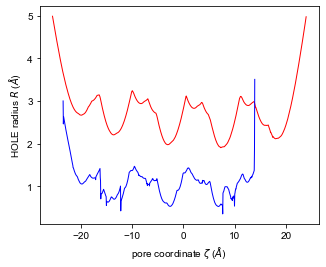

In [7]:
closed_xray = HOLE("../../1-Trajectories/0-Parm_rst/closed6_dry_rot1.pdb", endrad=5,
                   sphpdb="./hole_open.sph", sample=0.1, cvect=[0,0,-1], 
                   executable="/home/el14718/Software/hole2/exe/hole") 
closed_xray.run()
closed_xray.collect()
closed_xray.create_vmd_surface(filename='hole_closed_xray.vmd')


fig, ax = plt.subplots(figsize=(5,4))
ax = open_xray.plot(linewidth=1, color="red", label=False)
ax = closed_xray.plot(linewidth=1, color="blue", label=False)

# ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
# ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

# ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))

# fig.savefig('./plots/1-With_IPA/2_initial_FES.png', dpi=600)

In [ ]:


test = mda.Universe('./test.xtc',\
                  '../test.xtc')
H_test = HOLEtraj(U_Hex2_1_holo , step=1, endrad=5, sample=0.1, cvect=[0,0,1], \
             executable="/home/el14718/Software/hole2/exe/hole")  # set path to your hole binary
H_test.run()
H_test.collect()


In [ ]:
%%time

open_xray = HOLE("../1-Trajectories/0-Parm_rst/open10_dry.pdb", endrad=5,\
                   sample=0.1, cvect=[0,0,1], executable="/home/el14718/el14718/SOFTWARE/hole2/exe/hole") 

H_Hex2_1_xray.run()
H_Hex2_1_xray.collect()


U_Hex2_1_holo = mda.Universe('../4-CC-Hex2/2-MD/ccHex2_all_prod_dry_oriented_noDPH_site1.pdb',\
                  '../4-CC-Hex2/2-MD/ccHex2_all_prod_dry_oriented_noDPH_site1.dcd')
alignment = align.AlignTraj(U_Hex2_1_holo, u, filename='../4-CC-Hex2/2-MD/tmp1.dcd')
alignment.run()

U_Hex2_1_holo = mda.Universe('../4-CC-Hex2/2-MD/tmp.pdb',\
                  '../4-CC-Hex2/2-MD/tmp1.dcd')
H_Hex2_1_holo = HOLEtraj(U_Hex2_1_holo , step=100, endrad=5, sample=0.1, cvect=[0,0,1], \
             executable="/home/el14718/el14718/SOFTWARE/hole2/exe/hole")  # set path to your hole binary
H_Hex2_1_holo.run()



U_Hex2_1_apo = mda.Universe('../4-CC-Hex2/3-MD_apo/ccHex2_all_prod_dry_oriented_centroid_bb_apo.pdb',\
                  '../4-CC-Hex2/3-MD_apo/ccHex2_all_prod_dry_oriented_apo.dcd')
alignment = align.AlignTraj(U_Hex2_1_apo, u, filename='../4-CC-Hex2/3-MD_apo/tmp2.dcd')
alignment.run()

U_Hex2_1_apo = mda.Universe('../4-CC-Hex2/2-MD/tmp.pdb',\
                  '../4-CC-Hex2/3-MD_apo/tmp2.dcd')

H_Hex2_1_apo = HOLEtraj(U_Hex2_1_apo , step=100, endrad=5, sample=0.1, cvect=[0,0,1], \
             executable="/home/el14718/el14718/SOFTWARE/hole2/exe/hole")  # set path to your hole binary
H_Hex2_1_apo.run()